In [138]:
import random
from os import sep, listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np 
from scipy import ndimage
import skimage.transform as tr
from scipy.io import loadmat, savemat
from configparser import ConfigParser
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA 
from sklearn.mixture import GaussianMixture
import skfuzzy as skf
import spectral as sp
import shapefile as sf
import pandas as pd

### Getting Hyperspectral and LiDAR chm .mat files 
Ensure The dataset has been fetched and processed 


In [9]:
DATASET_PATH = 'ECODSEdataset' + sep + 'ECODSEdataset'+ sep + 'RSdata'+ sep 
LIDAR_FOLDER_PATH = DATASET_PATH + 'chm' + sep + 'MAT' + sep 
HYPER_FOLDER_PATH = DATASET_PATH + 'hs'  + sep + 'MAT' + sep 
HYPER_BANDS_FILE = 'ECODSEdataset' + sep + 'ECODSEdataset' + sep + 'hyper_bands.csv'

try: 
    lidar_files = sorted([lidar_file for lidar_file in 
                 [f for f in listdir(LIDAR_FOLDER_PATH) if isfile(join(LIDAR_FOLDER_PATH, f))]])
    hyper_files = sorted([hyper_file for hyper_file in 
                 [f for f in listdir(HYPER_FOLDER_PATH) if isfile(join(HYPER_FOLDER_PATH, f))]])
    hyper_bands = pd.read_csv(HYPER_BANDS_FILE)
except FileNotFoundError: 
    print("Failed to find Processed Dataset.\nPlease follow the README instructions to fetch and process the dataset")


In [10]:
# TODO Remove this 
wavelengths = hyper_bands['Band_nanometers']

### Plotting Functions

In [11]:
def plot_chm(im):
    cmap = cm.get_cmap('tab20c', 4)
    plt.imshow(im, cmap=cmap, vmin=0, vmax=1, origin='lower')
    plt.title("LiDAR Heat Map")
    plt.colorbar(ticks=np.linspace(0,1,5))
    plt.show()

def plot_hyper(im):
    sp.imshow(im, (80,80,420), origin="lower")
    
def plot_hyper_bands(im, pixel_x, pixel_y, wavelengths):
    f, ax = plt.subplots(1,1)
    ax.set_xlabel('Wavelength(nm)')
    ax.set_ylabel('Intensity')
    ax.plot(wavelengths, im[pixel_x][pixel_y])
    ax.set_title('Hyperspectral Intensity for a band')
    f.savefig('BeforeNoiseReduction.png')
    plt.show()

#### Hyperspectral Image Bands without any processing

In [114]:
hyper_image = loadmat(HYPER_FOLDER_PATH + hyper_files[3])['image'] 
old_image = loadmat(DATASET_PATH + 'hs'  + sep + 'backup' + sep + 'OSBS_005_hyper.mat')['image'] 
# plot_hyper_bands(hyper_image, pixel_x=40, pixel_y=25, wavelengths=wavelengths)

In [106]:
print(HYPER_FOLDER_PATH + hyper_files[23])

ECODSEdataset\ECODSEdataset\RSdata\hs\MAT\OSBS_028_hyper.mat


### Dimensionality Reduction for Hyperspectral Images

In [76]:
def trim_bands(source_list, filter_list):
    trimmed = []
    for i in range(len(filter_list)):
        if filter_list[i] == 0:
            trimmed.append(source_list[i])
    return trimmed 

def purge_noisy_bands(image, band_filter):
    out = np.zeros([80,80,369])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            out[i][j] = trim_bands(image[i][j], band_filter)
    return out
            
def process_hyper_images():
    pass

#### Using the Band Filter in Data set to reduce dimensionality

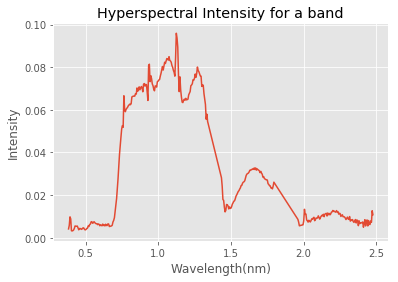

In [115]:
# wavelengths = hyper_bands['Band_nanometers']
noise_flags = hyper_bands['Noise_flag']
trimmed = old_image[40][25]
trim_wavelengths = trim_bands(wavelengths, list(noise_flags))
plt.style.use('ggplot')
f, ax = plt.subplots(1,1)
ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('Intensity')
ax.plot(trim_wavelengths, trimmed)
ax.set_title('Hyperspectral Intensity for a band')
# f.savefig('AfterNoiseReduction.png')
plt.show()

In [78]:
def smoothen(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

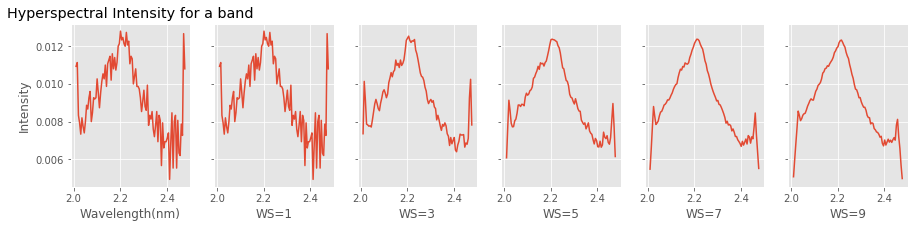

In [116]:
noisy = trimmed[275:]
f, axes = plt.subplots(1,6, sharey=True, figsize=(15,3))
axes[0].set_xlabel('Wavelength(nm)')
axes[0].set_ylabel('Intensity')
axes[0].set_title('Hyperspectral Intensity for a band')
axes[0].plot(trim_wavelengths[275:], trimmed[275:])
for i in range(5):
    axes[i+1].set_xlabel('WS=%d' % (2*i+1))
    axes[i+1].plot(trim_wavelengths[275:], smoothen(trimmed[275:], 2*i+1))
plt.show()

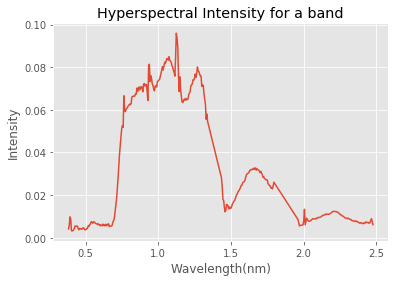

In [89]:
l = [1,2,3]
def change(l):
    l = list(map(lambda x: x*2, l))
    print(l)
change(l)
print(l)

[2, 4, 6]
[1, 2, 3]


In [82]:
np.append(trimmed[:275], smoothen(trimmed[275:], 5)).shape

(369,)

In [ ]:
out_image = purge_noisy_bands(hyper_image, noise_flags)

In [22]:
len(noise_flags[noise_flags == 1])

57

In [150]:
sf = shapefile.Reader("ITC_OSBS_004.shp")

# print("Initializing Display")
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.xlim([76, 85])
# plt.ylim([12, 21])
# print("Display Initialized")
# max_norm = float('-inf')
# for shape in sf.shapes(): 
#     x = np.array([i[0] for i in shape.points[:]])
#     y = np.array([i[1] for i in shape.points[:]])
#     max_norm = max(max_norm, x.max(), y.max())

for shape in sf.shapes():
    x = np.array([i[0] for i in shape.points[:]])
    # x /= 3285346.226354544
#     x /= max_norm
    y = np.array([i[1] for i in shape.points[:]])
#     y /= max_norm
#     print(x,y)
    plt.plot(x,y)
#     plt.axes.
plt.savefig('ShapeOut.png')
plt.show()


NameError: name 'shapefile' is not defined

## Clustering Main Code

In [120]:
def k_means_clustering(inp_image, n_clusters=2):
    if inp_image is None:
        print("Empty Input. Exiting")
        return None 
    # Create K Means Model 
    k_means = KMeans(n_clusters=n_clusters)
    shape = inp_image.shape
    # Fit on Input Image 
    k_means.fit(inp_image.flatten().reshape(shape[0]*shape[1],shape[2]))
    # Get Cluster Labels
    clust = k_means.labels_.astype(float)

    return clust.reshape(shape[0],shape[1])


def fuzzy_c_means(inp_image, n_clusters=2):
    if inp_image is None:
        print("Empty Input. Exiting")
        return 
    
    shape = inp_image.shape
    # Create and Train on FCM Model 
    centers, u, u0, d, jm, n_iters, fpc = skf.cluster.cmeans(
        inp_image.flatten().reshape(shape[0]*shape[1],shape[2]).T,
        c=n_clusters,
        m=float(config['FCM']['FUZZ_DEGREE']),
        error=float(config['FCM']['ERROR']),
        maxiter=int(config['FCM']['MAX_ITER']),
        init=None,
        seed=int(config['FCM']['SEED'])
    )
    # Get Cluster Labels with Max Porbability 
    clust = np.argmax(u, axis=0).astype(float)
    
    return clust.reshape(shape[0],shape[1])


def gaussian_mixture_model(inp_image, n_clusters=2):
    shape = inp_image.shape
    inp_image = inp_image.flatten().reshape(shape[0]*shape[1],shape[2])
    # Create Gaussian Mixture Model with Config Parameters
    gmm = GaussianMixture(
        n_components=n_clusters, covariance_type=config['GMM']['COVARIANCE_TYPE'],
        max_iter=int(config['GMM']['MAX_ITER']), random_state=int(config['GMM']['RANDOM_STATE']))
    # Fit on Input Image
    gmm.fit(X=inp_image)
    # Get Cluster Labels 
    clust = gmm.predict(X=inp_image)
    
    return clust.reshape(shape[0],shape[1])
   
def spectral_cluster(inp_image, n_clusters=2):
    original_shape = inp_image.shape
    downsampled_img = pyramid_reduce(inp_image,3)
    shape = downsampled_img.shape
    downsampled_img = downsampled_img.reshape(shape[0]*shape[1], shape[2])
    sp = SpectralClustering(n_clusters=n_clusters,
                               eigen_solver=config['SPECTRAL']['EIGEN_SOLVER'],
                               affinity=config["SPECTRAL"]["AFFINITY"])
    sp.fit_predict(downsampled_img)
    clust = sp.labels_
    clust = clust.reshape(shape[0],shape[1])
    # Performimg kmeans to re generate clusters after resize, original segmentation remains intact.
    clust =  k_means_clustering(n_clusters,resize(clust,(original_shape[:-1])).reshape((original_shape[:-1])+(1,)))
    return clust
    
def SOM(inp_image, n_clusters=5, n_job=5, map_dim=20):

    # Calculate the map
    mapsize = [map_dim,map_dim]
    shape = inp_image.shape
    data = inp_image.flatten().reshape(shape[0]*shape[1],shape[2])
    som = sompy.SOMFactory.build(data, mapsize)  
    som.train(n_job=n_job, verbose=None)
    
    #calculating clusters
    cl = som.cluster(n_clusters=n_clusters)
    
    # calculating which pixel is associated which cluster
    project_data = som.project_data(data)
    clust = np.zeros((shape[0], shape[1]))
    for i, q in enumerate(project_data):
        temp = cl[q]
        clust[np.unravel_index(i, dims=((shape[0], shape[1])))] = temp

    return clust

def connected_compoments(clustered):
    new = np.zeros(clustered.shape+(2,))
    for i in np.unique(clustered):
        CCIm, nr_objects = ndimage.label((clustered ==i)*1)
        for index, value in np.ndenumerate(CCIm):
            if value !=0:
                new[index] = temp= [i, value]
    return new

def postprocess(inp_image):
    # Median filter as a post processing step to remove small clusters.
    window_size = int(config['MEDIAN_FILTER']['WINDOW_SIZE'])
    return ndimage.median_filter(inp_image, size=window_size)

In [147]:
image = hyper_image 
config = ConfigParser() 
config.read('appConfig.ini')

['appConfig.ini']

(6400, 369)


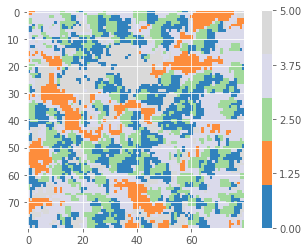

In [148]:
n_components = int(config['HYPER']['N_COMPONENTS'])
shape = image.shape 
hyper = image.flatten().reshape(shape[0]*shape[1],shape[2])
print(hyper.shape)
pca = PCA(n_components=n_components, svd_solver='auto').fit(hyper)
reduced_image = pca.transform(hyper).reshape(shape[0],shape[1],n_components)
out_labels = k_means_clustering(reduced_image, 5)
label_show(out_labels)

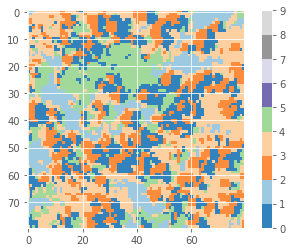

In [149]:
def label_show(im):
    cmap = cm.get_cmap('tab20c', 9)
    plt.imshow(im, cmap=cmap, vmin=0, vmax=9)
    plt.colorbar(ticks=np.linspace(0,9,10))
    plt.show()
label_show(out_labels)

array([[4., 4., 4., ..., 0., 0., 3.],
       [4., 4., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 4., 3., 2.],
       [1., 1., 1., ..., 4., 3., 2.],
       [3., 1., 0., ..., 3., 3., 2.]])